### GPN's Brain Aging Prediction Data - Step01_structural_processing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 40]

In [3]:
import radio as rio
from radio.data.datautils import get_first_batch, plot_batch

#### Setup Data

In [4]:
# Takes a while because it scans CEREBRO Study directory for the data.
# Pre-storing the data into train and test folders will speed up the process.
data = rio.data.BrainAgingPredictionDataModule(
    use_augmentation=False,
    resample=True,
    batch_size=32,
    intensities=["T1", "FLAIR"],
    labels=[],
)
data.prepare_data()
print(data.has_complete_split)
print(data.has_train_test_split)
print(data.has_train_val_split)

False
False
False


DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `dims` was deprecated in v1.5 and will be removed in v1.7.


In [5]:
data.setup()

DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `dims` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.


In [6]:
print(f"Training: {data.size_train} subjects.")
print(f"Validation: {data.size_val} subjects.")
print(f"Test: {data.size_test} subjects.")

Training: 496 subjects.
Validation: 123 subjects.
Test: 155 subjects.


#### Get a Train and a Test Batch

In [7]:
train_dataloaders = data.train_dataloader()
val_dataloaders = data.val_dataloader()
test_dataloaders = data.test_dataloader()

In [8]:
# Takes a long time if resampling is required.
# Preprocessing beforehand is therefore recommended to speed up training.
train_batch = get_first_batch(train_dataloaders[0])
test_batch = get_first_batch(test_dataloaders[0])

In [9]:
print(f"Batch keys: {train_batch.keys()}")
print(f"Sample shape: {train_batch['T1']['data'].shape}")
print(f"Image keys: {train_batch['T1'].keys()}")
print(f"Subject IDs: {train_batch['subj_id']}")
print(f"Scan IDs: {train_batch['scan_id']}")

Batch keys: dict_keys(['subj_id', 'scan_id', 'T1', 'FLAIR'])
Sample shape: torch.Size([32, 1, 160, 192, 160])
Image keys: dict_keys(['data', 'affine', 'path', 'stem', 'type'])
Subject IDs: ['ABD_AJ_0098', 'ABD_AJ_0162', 'ABD_GJ_0182', 'ABD_SW_0140', 'ABD_AJ_0176', 'ABD_SS_0013', 'ABD_SS_0006', 'ABD_SW_0050', 'ABD_SW_0143', 'ABD_AJ_0064', 'ABD_CN_0010', 'ABD_AJ_0165', 'ABD_SS_0049', 'ABD_SW_0121', 'ABD_SW_0097', 'ABD_BS_0030', 'ABD_SS_0027', 'ABD_AJ_0023', 'ABD_IH_0017', 'ABD_SW_0169', 'ABD_IH_0059', 'ABD_AJ_0097', 'ABD_AJ_0122', 'ABD_SW_0022', 'ABD_SS_0068', 'ABD_GJ_0143', 'ABD_AJ_0155', 'ABD_GJ_0141', 'ABD_AJ_0091', 'ABD_AJ_0154', 'ABD_SW_0129', 'ABD_IH_0113']
Scan IDs: ['scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan002', 'scan001', 'scan002', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan002', 'scan001', 'scan001', 'scan001', 'scan002', 'scan002', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan002', 

#### Save Preprocessed Images

In [12]:
data.save(train_dataloaders[0], fold='train')

In [13]:
data.save(test_dataloaders[0], fold='test')
data.save(val_dataloaders[0], fold='val')

#### Plot Example Train and Test Data

Subject: 0


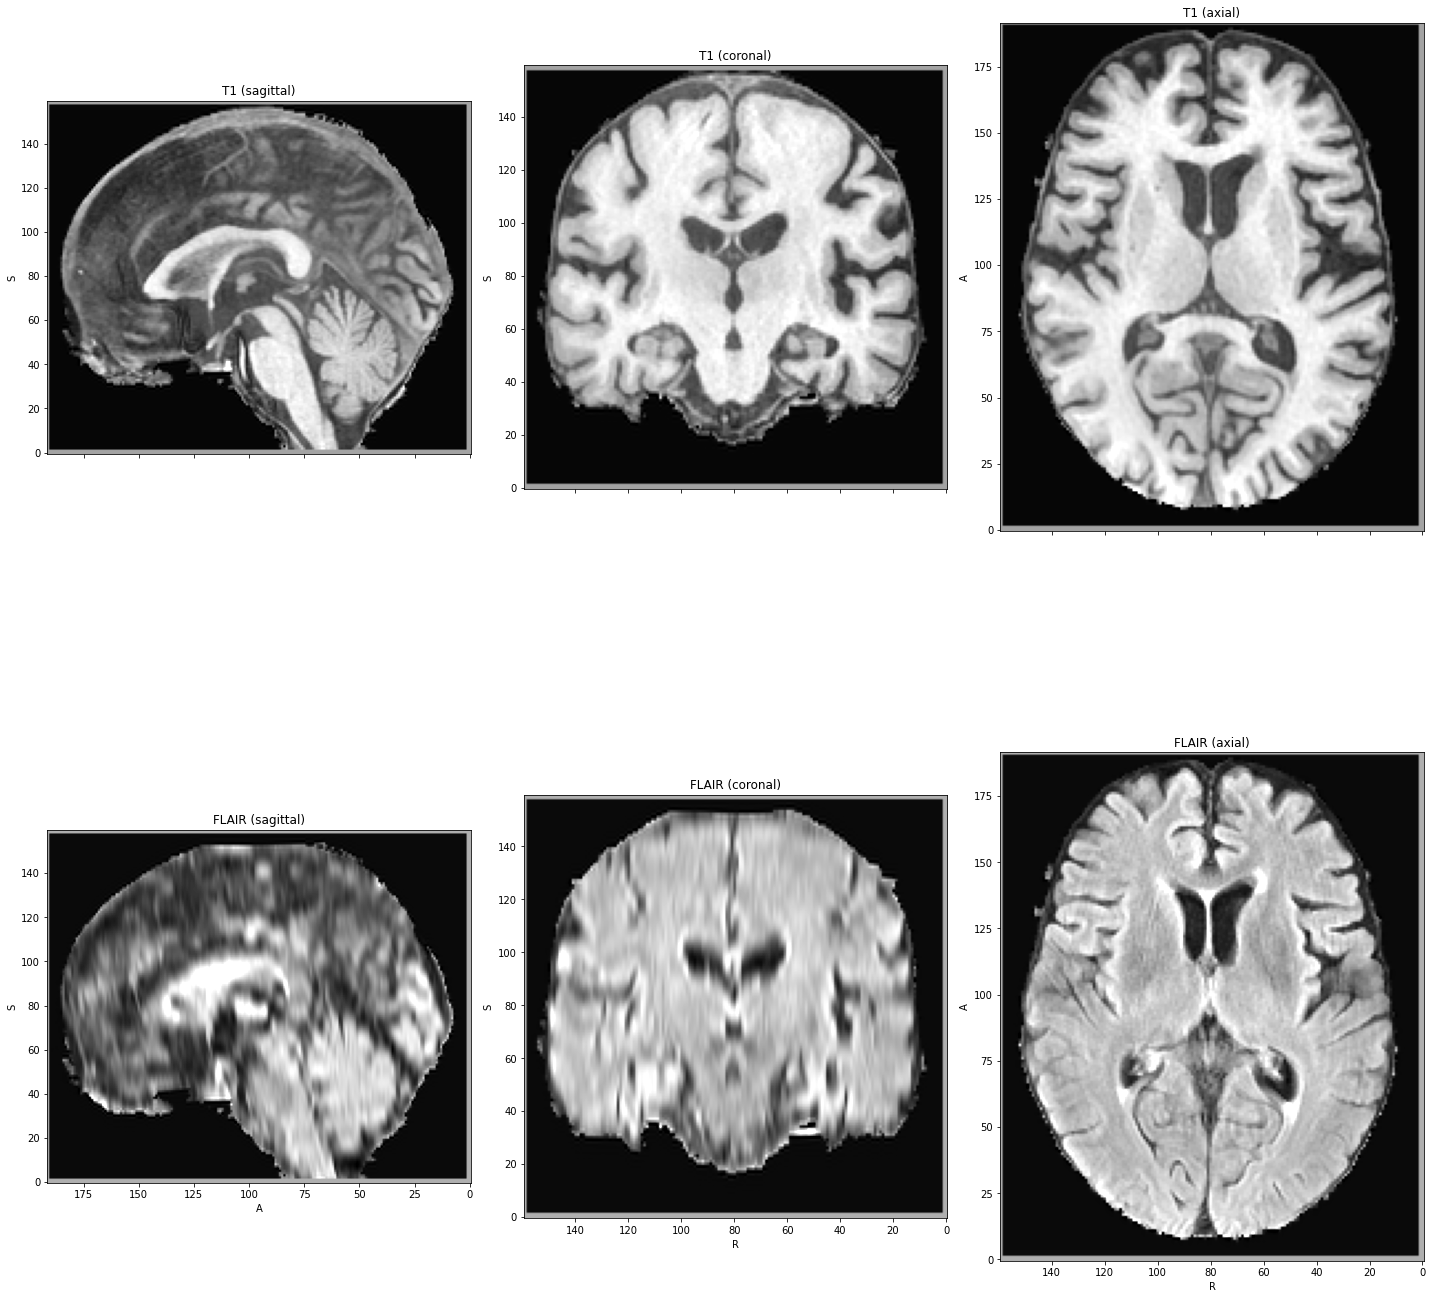



Subject: 1


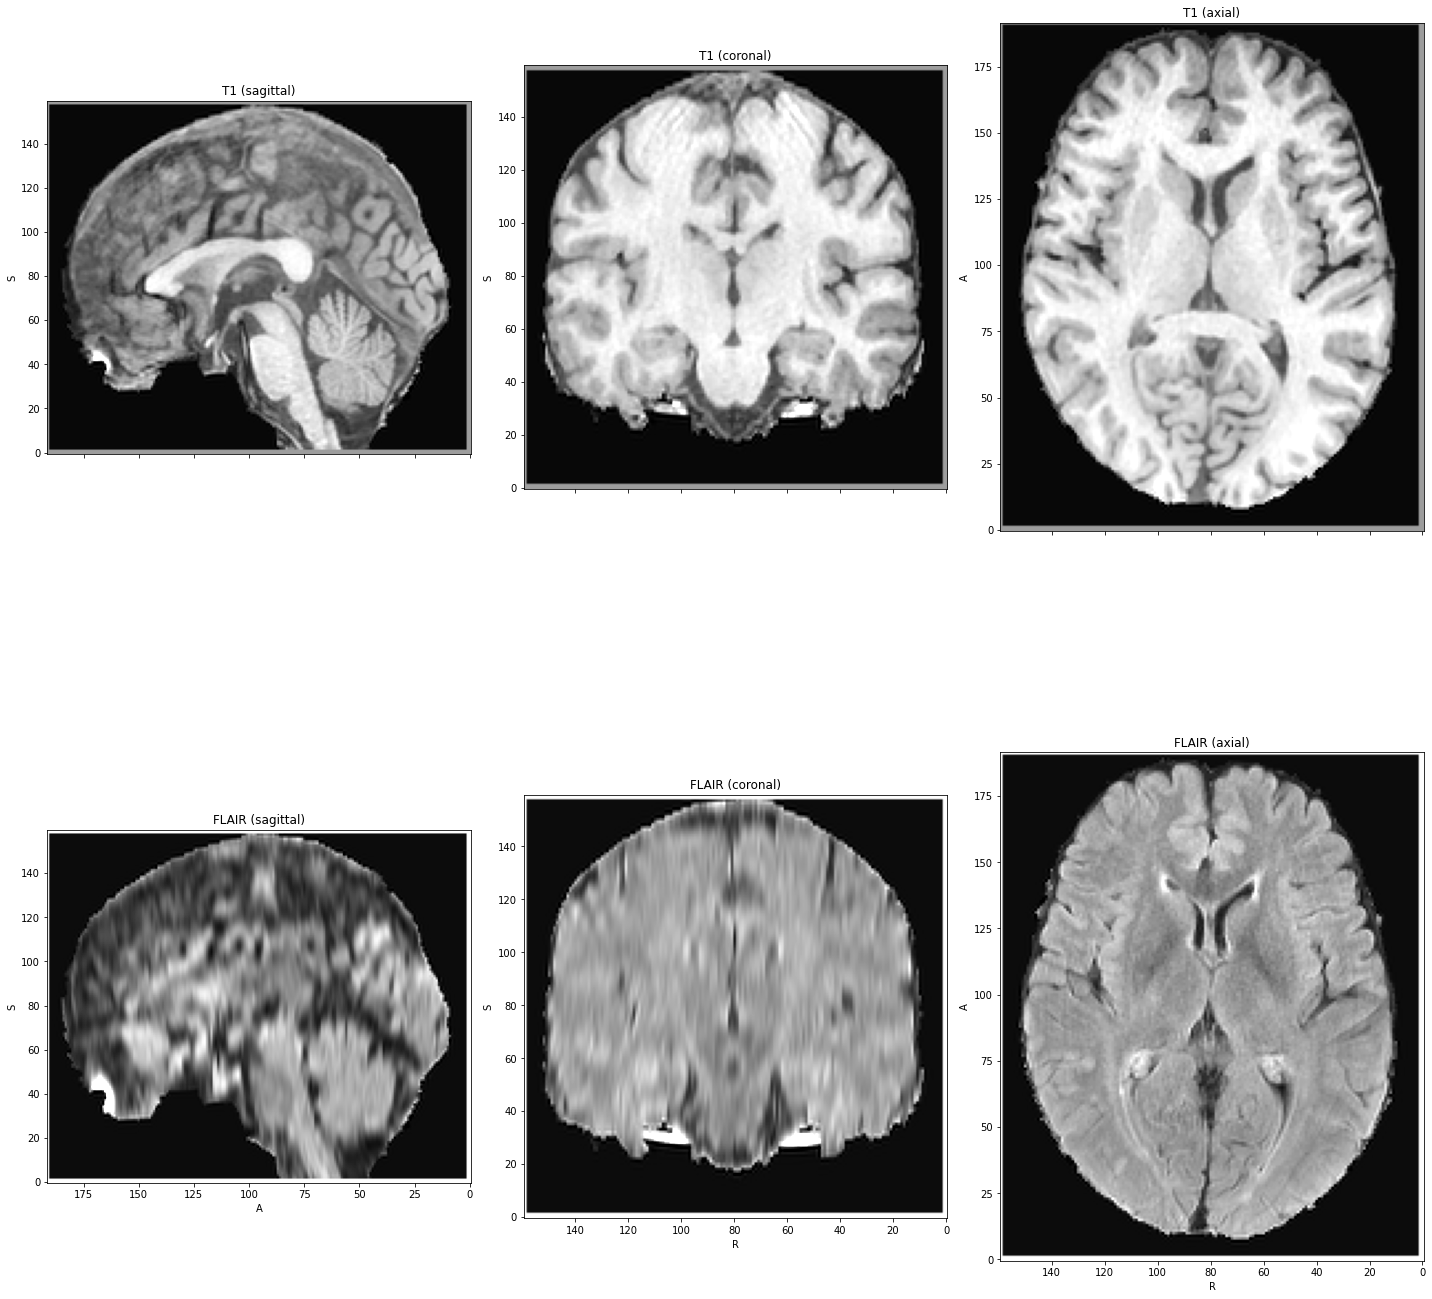



Subject: 2


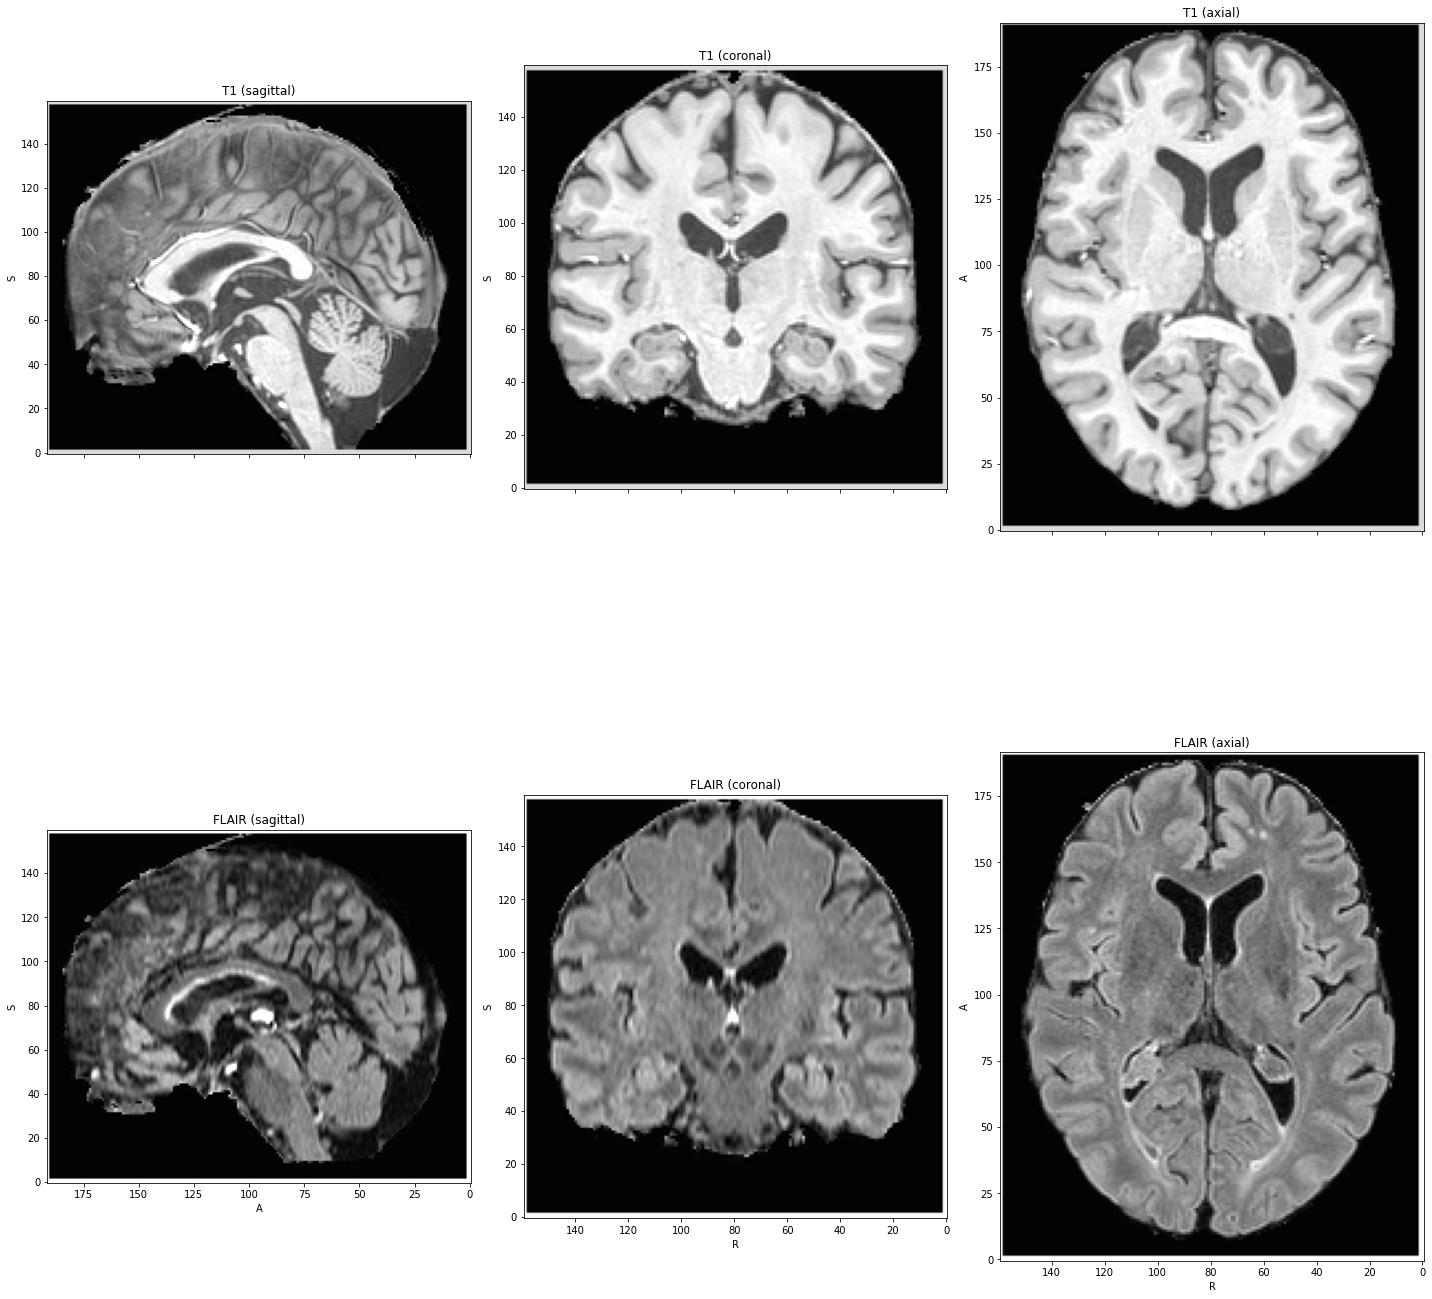



Subject: 3


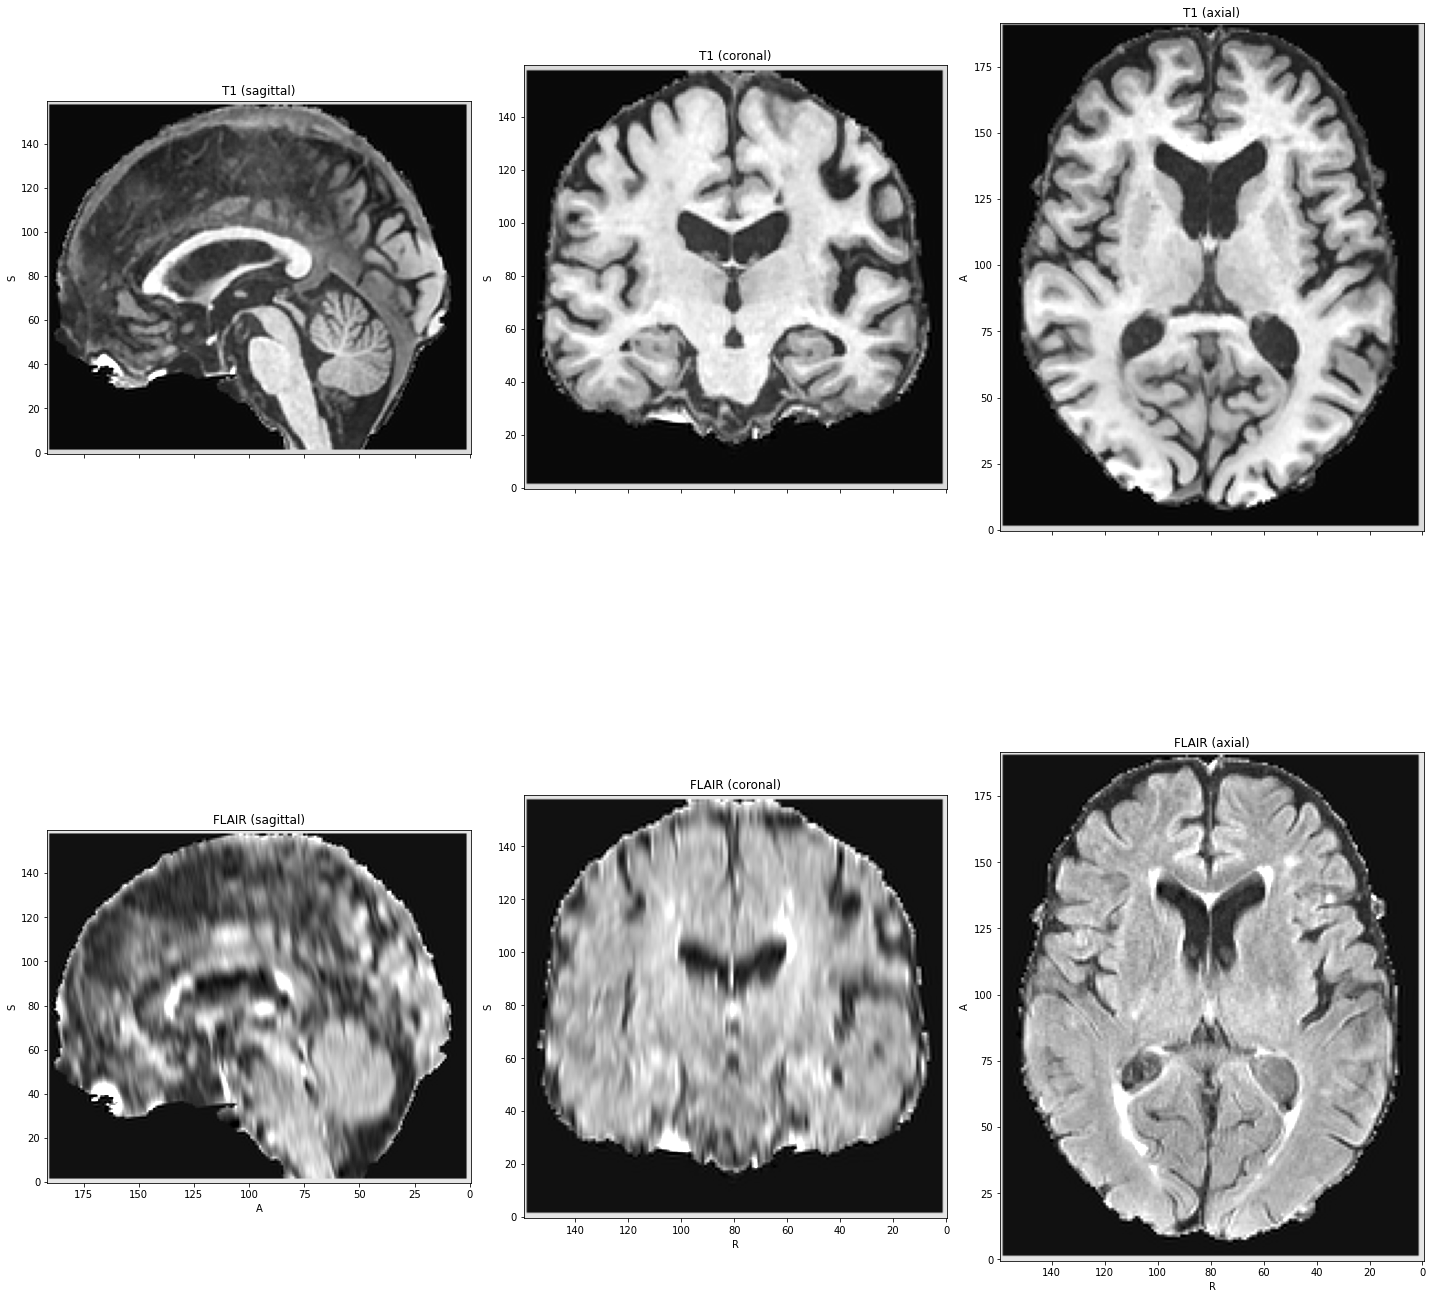

In [10]:
plot_batch(train_batch)

Subject: 0


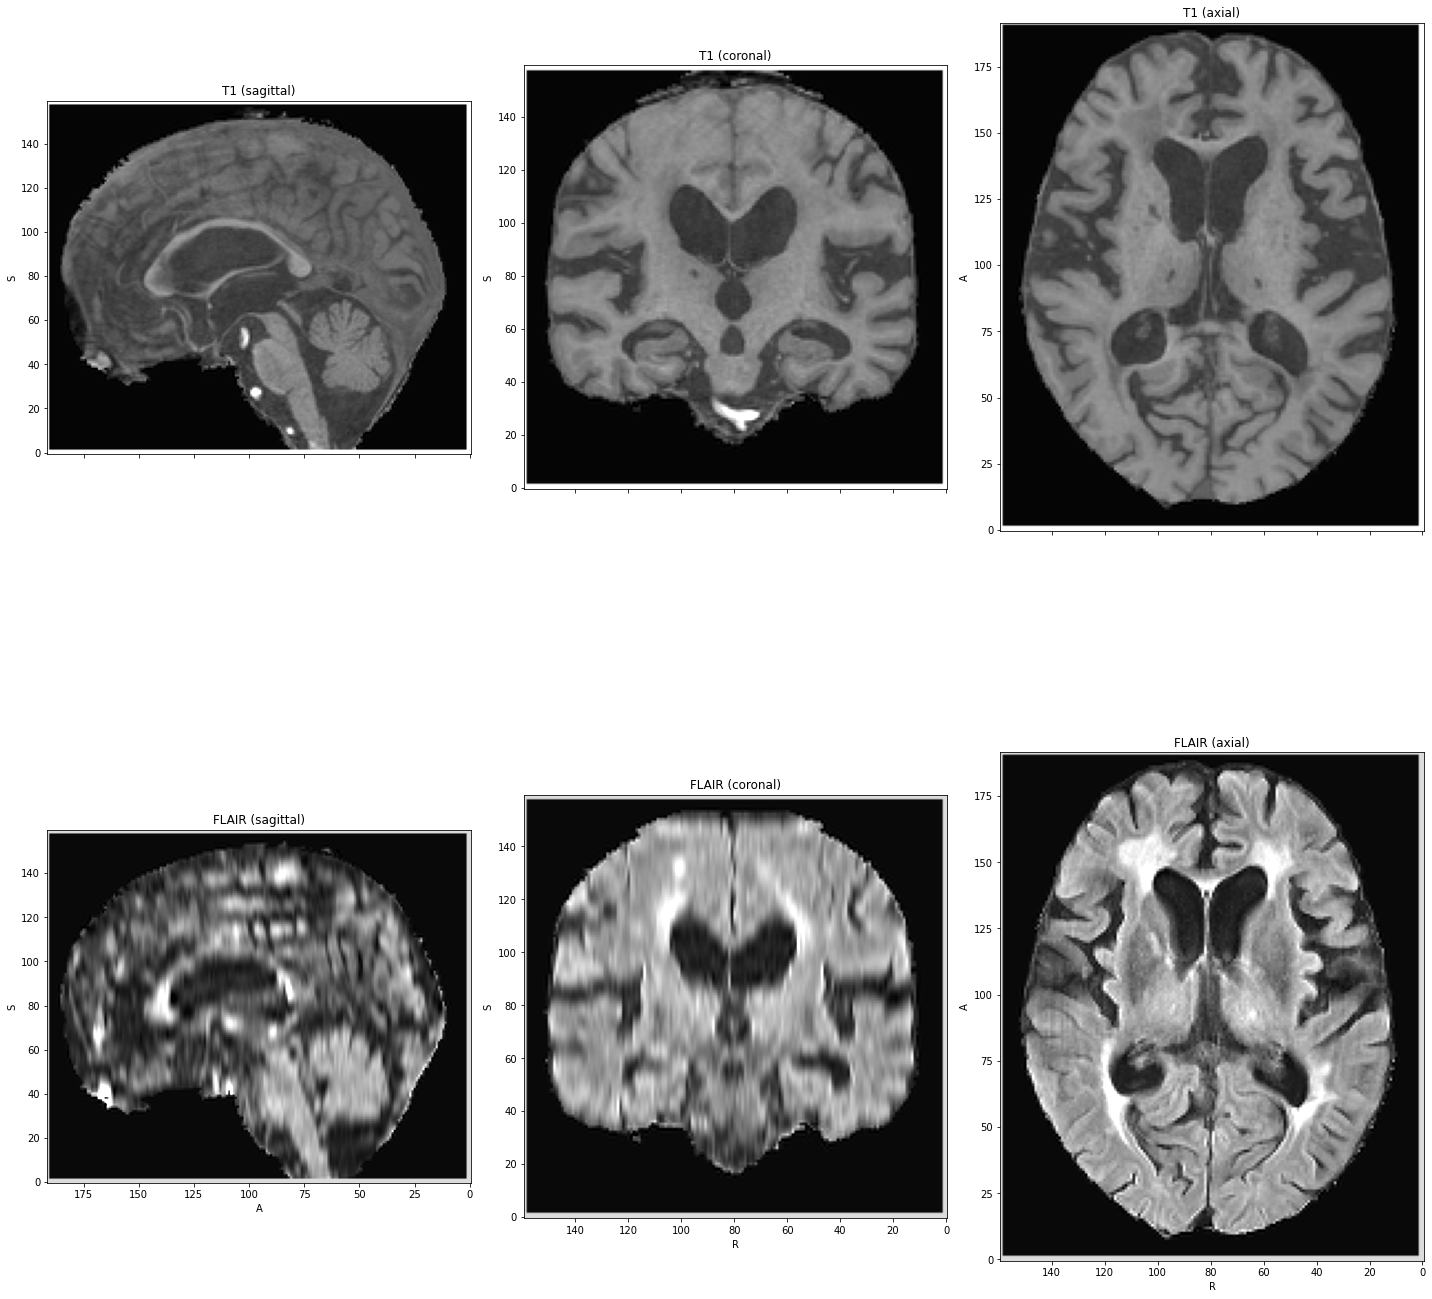



Subject: 1


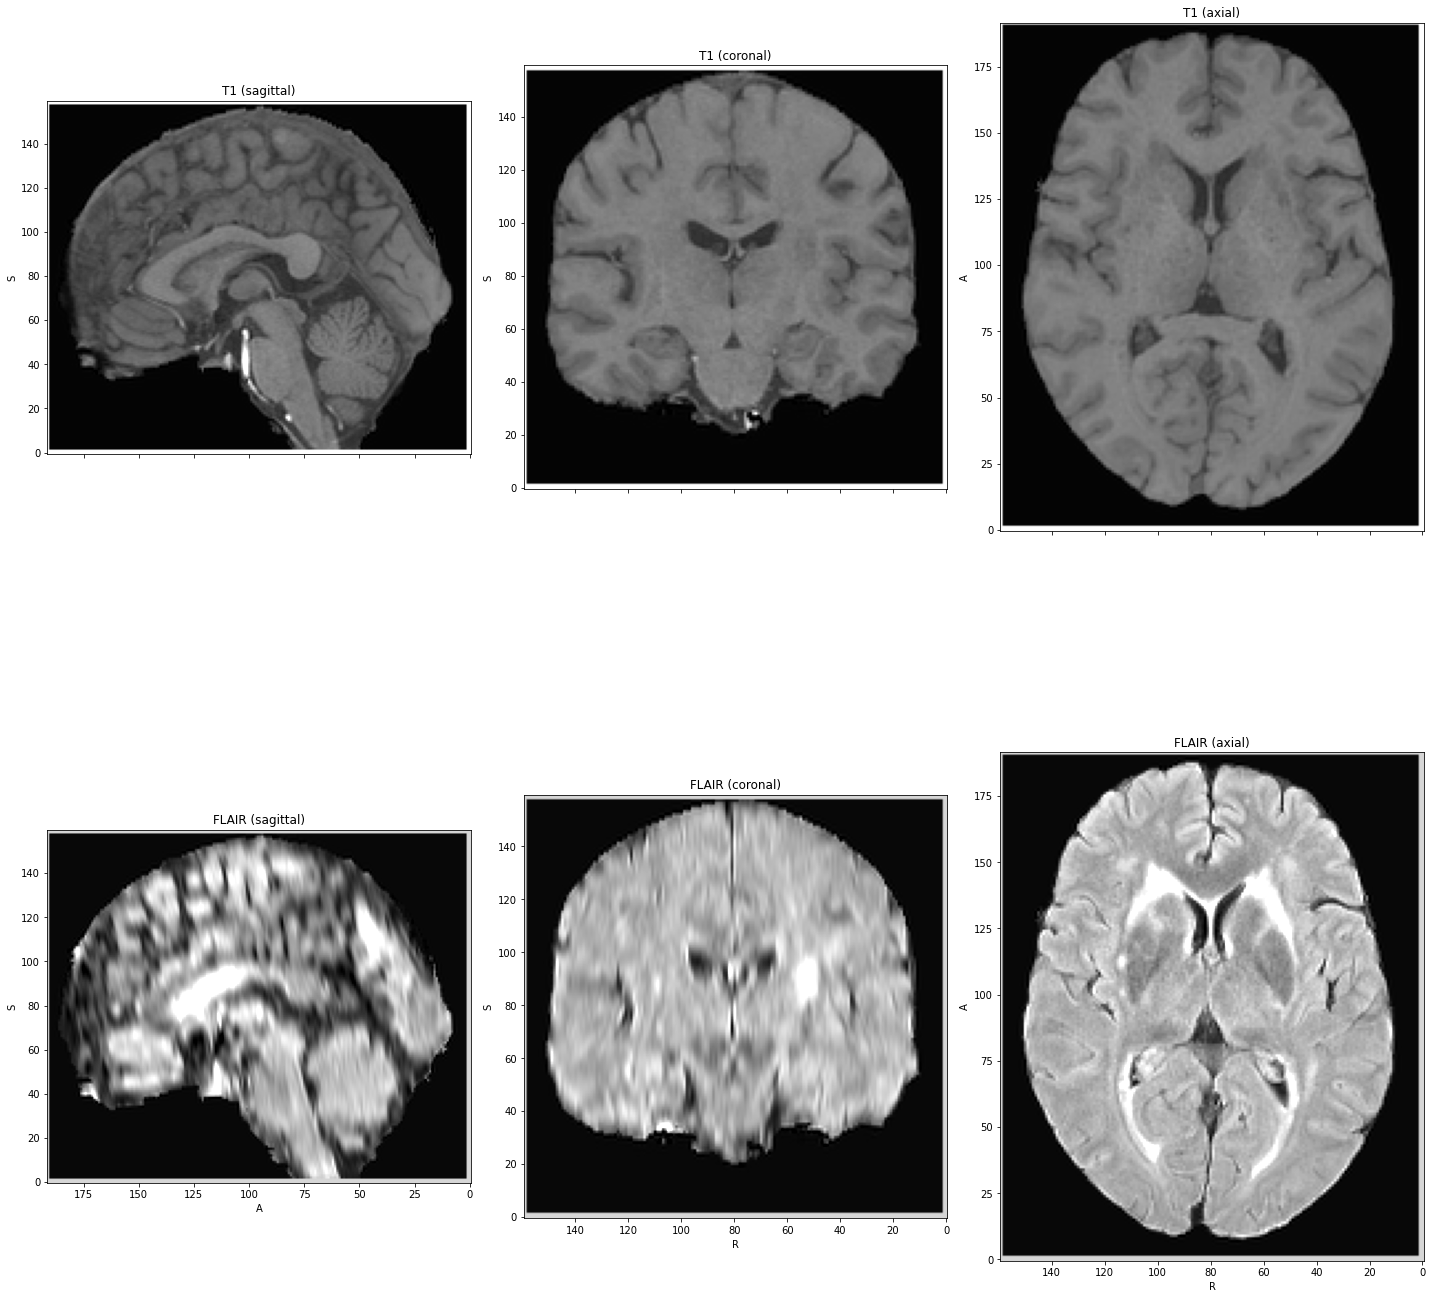



Subject: 2


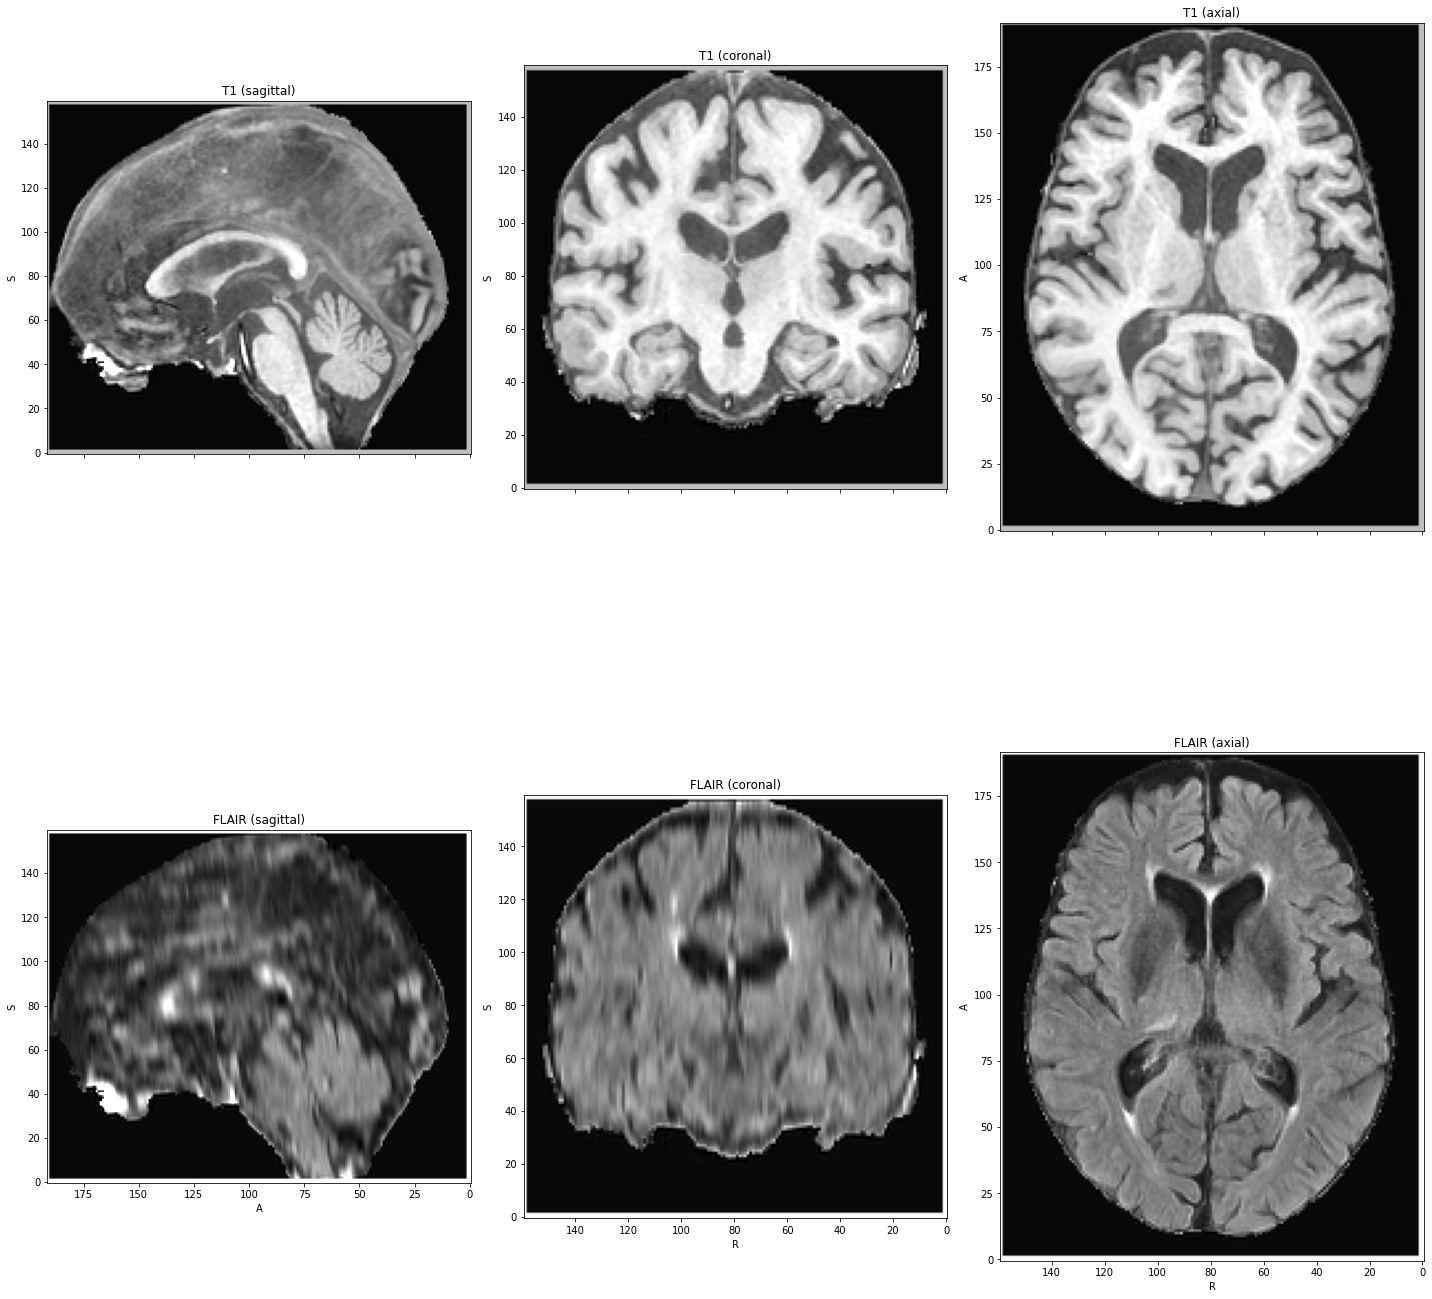



Subject: 3


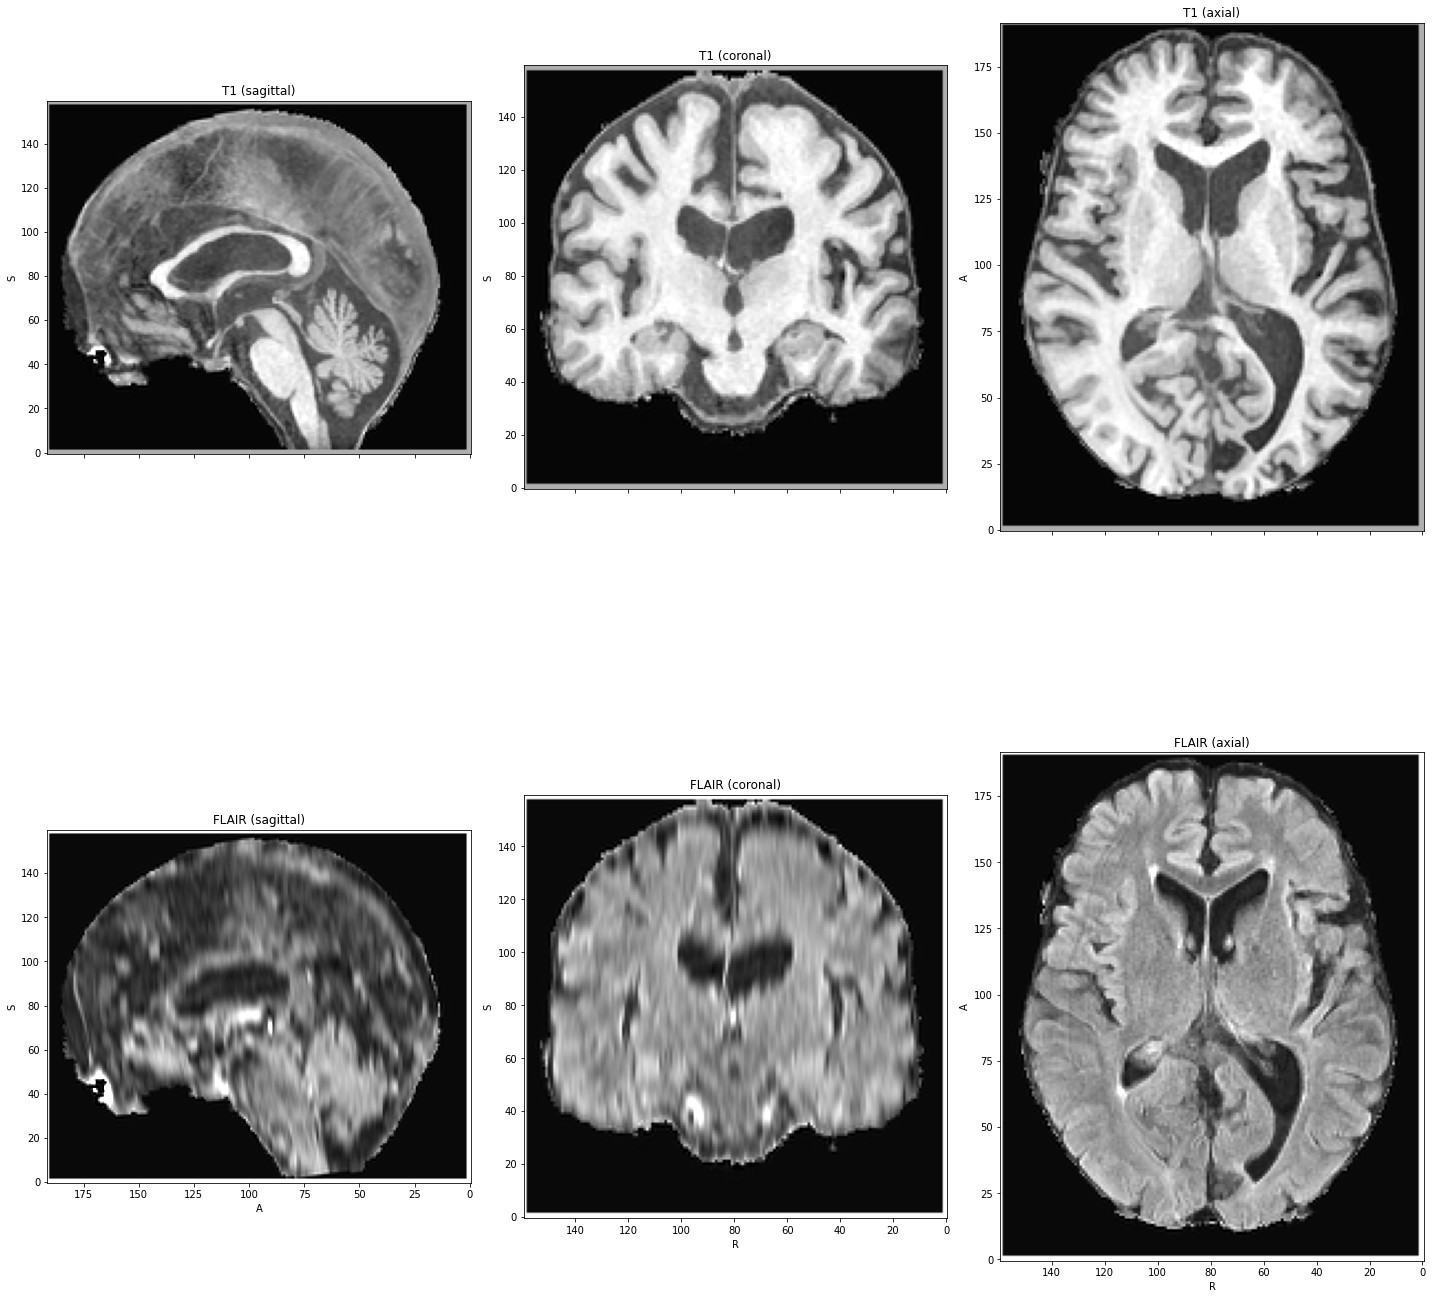

In [11]:
plot_batch(test_batch)